In [217]:
import os
import librosa
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
import csv

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import layers

In [218]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
dataset_dir = 'D:/Study/Project/Dataset/songs/'

# 1) load a sample music: Beatles

In [219]:
# import IPython.display as ipd
# audiopath = dataset_dir + 'samples/'+'Let It Be (Remastered 2015).mp3'
# test = 'C:/Users/Jason/Downloads/samples/Let It Be (Remastered 2015).mp3'
# ipd.Audio(test)

In [220]:
from google.colab import drive

general_path = "/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples"

def song_names(general_path):
    files = list(os.listdir(f'{general_path}'))
    return files    # filename

In [221]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
filename = song_names(general_path)
filename

['Bread - If (with lyrics).mp3',
 'Close to you - The Carpenters (She Was Pretty OST).mp3',
 'Cyndi Lauper - Time After Time (Official HD Video).mp3',
 'Earth, Wind & Fire - September (Official HD Video).mp3',
 'Eric Carmen - All by Myself (Audio).mp3',
 'Let It Be (Remastered 2015).mp3',
 "NOTHING'S GONNA CHANGE MY LOVE FOR YOU (with lyrics) - GEORGE BENSON.mp3",
 'Raindrops Keep Falling on my Head.mp3',
 'Richard Sanderson - Reality - du Film La Boum.mp3',
 'a-ha - Take On Me (Official Video) [Remastered in 4K].mp3',
 '_30secs',
 'genre']

In [223]:
def load_song(filename):
    song = f'{filename}'
    path = f'{general_path}/{filename}'
    return song, path

In [224]:
songs = []
paths = []

for file in filename:
    song, path = load_song(file)
    songs.append(f"{song}")
    paths.append(f"{path}")

In [225]:
ipd.Audio(paths[5])
audiopath = paths[5]

In [212]:
! pip install pydub

In [213]:
# from pydub import AudioSegment

# # files                                                                       
# src = audiopath
# dst = filename[5].replace(".mp3","")+".wav"

# # convert wav to mp3                                                            
# audSeg = AudioSegment.from_file(src, format="mp4")
# audSeg.export(dst, format="wav")

In [214]:
song = AudioSegment.from_wav("Let It Be (Remastered 2015).wav")
# Slice audio
# pydub는 milliseconds 단위를 사용한다
thirty_seconds = 30 * 1000
ths = song[:thirty_seconds]
ths.export('result.wav', format='wav', parameters=["-q:a", "10", "-ac", "1"])
smp = "result.wav"

In [229]:
from pydub import AudioSegment
ths_lists = []
for file in paths:
    dst = file.replace(".mp3","")+".wav"                                                             
    audSeg = AudioSegment.from_file(file, format="mp4")  # convert wav from mp3 
    audSeg.export(dst, format="wav")
    song = AudioSegment.from_wav(dst)
    thirty_seconds = 30 * 1000
    ths = song[:thirty_seconds]
    path = "/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples"
    name = f'{file.replace(".mp3","").replace(path,"")}_30.wav'
    full_path = path+"/_30secs"+name
    ths.export(full_path, format='wav', parameters=["-q:a", "10", "-ac", "1"])
    ths_lists.append(full_path)

IsADirectoryError: ignored

In [230]:
ths_lists

['/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs/Bread - If (with lyrics)_30.wav',
 '/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs/Close to you - The Carpenters (She Was Pretty OST)_30.wav',
 '/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs/Cyndi Lauper - Time After Time (Official HD Video)_30.wav',
 '/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs/Earth, Wind & Fire - September (Official HD Video)_30.wav',
 '/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs/Eric Carmen - All by Myself (Audio)_30.wav',
 '/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs/Let It Be (Remastered 2015)_30.wav',
 "/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs/NOTHING'S GONNA CHANGE MY LOVE FOR YOU (with lyrics) - GEORGE BENSON_30.wav",
 '/content/drive/Othercomputers/내 노트북/Project/Dataset/

In [62]:
# song = AudioSegment.from_mp3("1.mp3")

# sixty_seconds = 30 * 1000

# for i in range(int(math.floor(len(song)/30000))):
#     slice = song[i*sixty_seconds:sixty_seconds*(i+1)]
#     slice.export('newSong_{}.mp3'.format(i), format="wav")

# Display the waveform of the music:

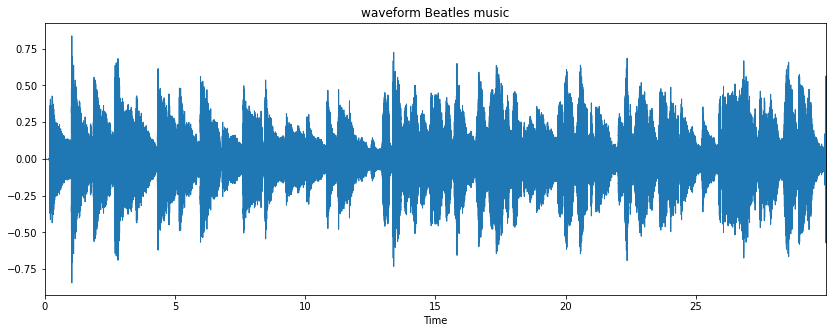

In [231]:
sound, sr = librosa.load(smp, duration = 30)
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
plt.title('waveform Beatles music')
librosa.display.waveplot(sound, sr=sr)

# Display the Spectrogram:

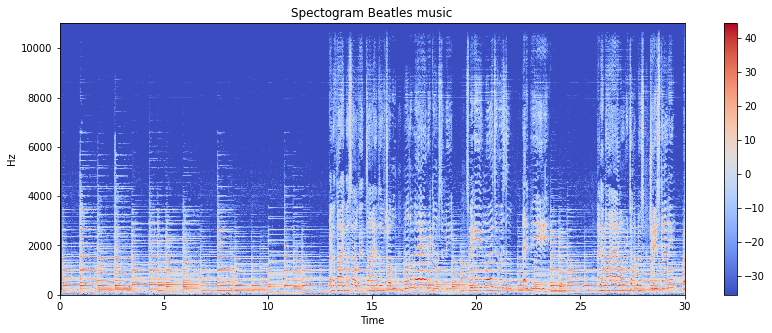

In [232]:
X = librosa.stft(sound)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.title('Spectogram Beatles music')
plt.colorbar()

# Features: 

## Zero crossing rate: 
 The number of times the soundwave cross zero

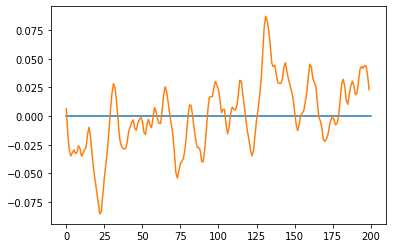

In [ ]:
plt.plot([0,200],[0,0])
plt.plot(sound[9000:9200])

In [ ]:
zero_crossings = librosa.zero_crossings(sound[9000:9200], pad=False)
print(sum(zero_crossings))

18


## Spectral Centroid: 


It is calculated as the [[weighted mean]] of the frequencies present in the signal, determined using a [[Fourier transform]], with their magnitudes as the weights:

$$
\mathrm{Centroid} = \frac{
  \sum_{n=0}^{N-1}
    f(n)
    x(n)
} {
  \sum_{n=0}^{N-1}
    x(n)
}
$$

where ''x(n)'' represents the weighted frequency value, or magnitude, of [[Histogram|bin]] number ''n'', and ''f(n)'' represents the center frequency of that bin.

<ref>[http://recherche.ircam.fr/equipes/analyse-synthese/peeters/ARTICLES/Peeters_2003_cuidadoaudiofeatures.pdf A Large Set of Audio Features for Sound Description] - technical report published by [[IRCAM]] in 2003. Section 6.1.1 describes the spectral centroid.</ref>

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(sound, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(sound, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [ ]:
spectral_centroids

array([1904.94016614, 1793.40234891, 1650.46990105, ..., 1262.80028746,
       1288.27231532, 1311.75244261])

## Rollof frequency: 
The frequency above or below which a filter begins to filter out the harmonics of the waveform.

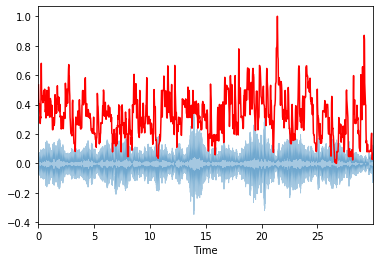

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(sound, sr=sr)[0]
librosa.display.waveplot(sound, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel Frequency Cepstral Coefficients (MFCCs):
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

(20, 1292)


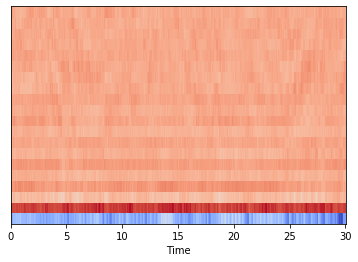

In [ ]:
mfccs = librosa.feature.mfcc(sound, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## spectral contrast:
Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband.

In [ ]:
spectral_contrast = librosa.feature.spectral_contrast(sound, sr=sr)
spectral_contrast.shape

(7, 1292)

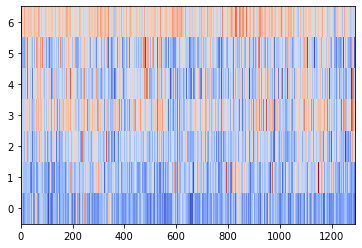

In [ ]:
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

## spectral bandwidth:
It computes the order- p  spectral bandwidth:
$$\left( \sum_k S(k) \left(f(k) - f_c \right)^p \right)^{\frac{1}{p}}$$

where  S(k)  is the spectral magnitude at frequency bin  k ,  f(k)  is the frequency at bin  k , and  fc  is the spectral centroid. When  p=2 , this is like a weighted standard deviation.

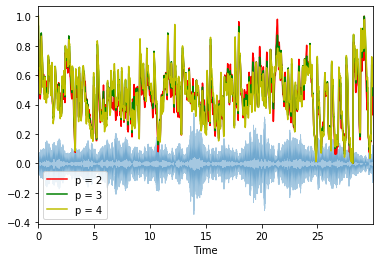

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(sound+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(sound+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(sound+0.01, sr=sr, p=4)[0]
librosa.display.waveplot(sound, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Spectral flatness:
Spectral flatness is defined as the ratio of the geometric mean to the arithmetic mean of a power spectrum.

In [ ]:
spectral_flatness = librosa.feature.spectral_flatness(sound)
spectral_flatness.shape

(1, 1292)

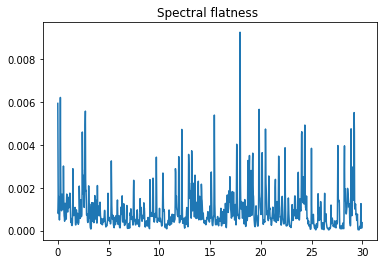

In [ ]:
plt.plot(t, spectral_flatness.reshape(1292,1))
plt.title('Spectral flatness ')
plt.show()

## chroma_stft: 
Compute a chromagram from a waveform or power spectrogram.

# Extract the features:

In [233]:
def get_features(y, sr):
    # Features to concatenate in the final dictionary
    features = {'centroid': None, 'roloff': None, 'flux': None, 'rmse': None,
                'zcr': None, 'contrast': None, 'bandwidth': None, 'flatness': None, 'chroma_stft': None}
    
    # Count silence
    if 0 < len(y):
        y_sound, _ = librosa.effects.trim(y)
    features['sample_silence'] = len(y) - len(y_sound)
    
    # Using librosa to calculate the features
    features['chroma_stft']=librosa.feature.chroma_stft(y=y, sr=sr).ravel()
    features['centroid'] = librosa.feature.spectral_centroid(y, sr=sr).ravel()
    features['roloff'] = librosa.feature.spectral_rolloff(y, sr=sr,).ravel()
    features['zcr'] = librosa.feature.zero_crossing_rate(y).ravel()
    features['rmse'] = librosa.feature.rms(y).ravel()
    features['flux'] = librosa.onset.onset_strength(y=y, sr=sr).ravel()
    features['contrast'] = librosa.feature.spectral_contrast(y, sr=sr).ravel()
    features['bandwidth'] = librosa.feature.spectral_bandwidth(y, sr=sr).ravel()
    features['flatness'] = librosa.feature.spectral_flatness(y).ravel()
    
    # MFCC treatment
    mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=13)
    for idx, v_mfcc in enumerate(mfcc):
        features['mfcc_{}'.format(idx)] = v_mfcc.ravel()
        
    # Get statistics from the vectors
    def get_moments(descriptors):
        result = {}
        for k, v in descriptors.items():
            result['{}_max'.format(k)] = np.max(v)
            result['{}_min'.format(k)] = np.min(v)
            result['{}_mean'.format(k)] = np.mean(v)
            result['{}_std'.format(k)] = np.std(v)
            result['{}_kurtosis'.format(k)] = kurtosis(v) # 첨도(파형의 밀도?)
            result['{}_skew'.format(k)] = skew(v) # 비대칭도
        return result
    
    dict_agg_features = get_moments(features)
    dict_agg_features['tempo'] = librosa.beat.tempo(y, sr=sr)[0]
    
    return dict_agg_features

In [234]:
dir_30sec = "/content/drive/Othercomputers/내 노트북/Project/Dataset/songs/samples/_30secs"

In [193]:
# def final_extraction(dataset_dir=dir_30sec):
#     genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
#     last_features=[]
#     for genre in genres:
#         path_genre = dataset_dir + '/' + genre 

#         for song in os.listdir(path_genre):        
#             path_song = path_genre + '/' + song
#             y, sr = librosa.load(path_song, duration = 30)
#             features = get_features(y, sr)
#             features['genre'] = genre
#             last_features.append(features)
#     return pd.DataFrame(last_features)

In [235]:
def final_extraction(dataset_dir=dir_30sec):
    # genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    last_features=[]
    for song in os.listdir(dataset_dir):        
        path_song = dataset_dir + '/' + song
        y, sr = librosa.load(path_song, duration = 30)
        features = get_features(y, sr)
        # features['genre'] = genre
        features['name'] = song.replace(".mp3_30.wav","").replace(".wav","")
        last_features.append(features)
    return pd.DataFrame(last_features)

In [236]:
%%time

df_features = final_extraction()

CPU times: user 23.5 s, sys: 4.5 s, total: 28 s
Wall time: 24.1 s


In [237]:
df_features

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo,name
0,4827.927560,0.000000,620.319443,508.622976,11.179393,1.856704,9097.778320,0.000000,976.819093,1006.188251,...,1.356939,0.413203,18.295551,-39.657761,-9.465662,10.426451,-0.476578,-0.573014,95.703125,Bread - If (with lyrics)_30
1,8651.642550,0.000000,1404.401324,803.917686,17.754018,3.813661,10486.669922,0.000000,2534.459674,1588.939227,...,-0.459345,0.436312,25.206493,-54.106583,-10.681284,15.505886,-0.716902,-0.090280,89.102909,Close to you - The Carpenters (She Was Pretty ...
2,3139.997994,0.000000,1479.117512,431.042374,2.046505,0.045133,5792.431641,0.000000,2865.416007,803.440681,...,0.874649,0.104757,6.011888,-33.594337,-11.482124,6.749685,0.188101,-0.344688,112.347147,Cyndi Lauper - Time After Time (Official HD Vi...
3,6969.617260,0.000000,2195.414839,662.680208,3.136365,0.305349,9539.208984,0.000000,4616.522085,1728.547766,...,0.894910,0.171877,27.420765,-24.535595,-4.197886,7.488391,0.457041,0.477462,123.046875,"Earth, Wind & Fire - September (Official HD Vi..."
4,5219.702536,0.000000,1053.354845,585.976969,14.275812,3.173846,9022.412109,0.000000,1936.354958,1148.294577,...,0.824235,-0.491096,15.917379,-34.581825,-4.668746,8.496342,0.218090,-0.301489,117.453835,Eric Carmen - All by Myself (Audio)_30
5,5209.316809,562.768029,1145.802608,653.942571,10.668839,2.807993,9054.711914,753.662109,2073.154131,1382.016137,...,0.201244,0.220724,23.909170,-36.369610,-7.977075,7.977680,0.484296,0.242270,143.554688,Let It Be (Remastered 2015)_30
6,5249.633953,0.000000,1313.761622,728.080249,4.516497,1.695279,8936.279297,0.000000,2569.742794,1767.001413,...,0.380589,0.448451,27.466259,-38.862396,-6.712247,9.784474,0.030473,0.053954,135.999178,NOTHING'S GONNA CHANGE MY LOVE FOR YOU (with l...
7,5077.240516,0.000000,1238.445617,741.222085,3.322262,1.749110,8764.013672,0.000000,2453.760162,1649.448397,...,0.011287,-0.232087,20.875214,-38.678413,-6.441185,8.289577,0.554101,-0.027112,107.666016,Raindrops Keep Falling on my Head_30
8,6394.083681,0.000000,1632.933996,834.901342,7.811999,2.169425,9872.973633,0.000000,3333.721508,1531.606322,...,-0.417467,-0.207052,20.068117,-42.018394,-9.568021,10.548285,-0.363335,-0.132017,143.554688,Richard Sanderson - Reality - du Film La Boum_30
9,10341.266271,0.000000,2298.910311,1114.130554,1.915543,-0.137886,10723.535156,0.000000,4869.103891,2133.362373,...,2.172713,0.987589,41.964043,-25.392929,0.148774,8.536514,1.587972,0.687068,83.354335,a-ha - Take On Me (Official Video) [Remastered...


## Export the data to a csv file:

In [238]:
df_features.to_csv('Data.csv', index=False)

## import the data:

In [ ]:
df_features = pd.read_csv('Data.csv')

In [ ]:
df_features.head()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo,genre
0,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,949.558806,...,-0.189109,-0.110339,22.482096,-26.569305,-3.667368,6.422199,0.313302,-0.037197,123.046875,blues
1,5444.293577,421.091729,1529.835316,613.175361,4.028086,1.339397,8085.717773,333.764648,3548.820207,1725.249654,...,0.054884,0.154526,19.230034,-27.189579,-2.239120,8.055376,-0.182963,0.004210,107.666016,blues
2,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,884.938380,...,0.542265,-0.682770,23.078028,-28.854303,-8.905224,7.774160,0.489465,0.710559,161.499023,blues
3,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,1222.395194,...,1.569782,0.613722,20.651333,-32.890564,-2.476421,7.538023,0.499351,-0.163374,172.265625,blues
4,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,1253.915665,...,0.430401,0.456069,24.070387,-36.607307,-6.934123,9.466887,0.057030,0.132279,135.999178,blues


# Visualization: 

## Dimensionality reduction :

In [239]:
df_features.corr()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo
centroid_max,1.000000,-0.151582,0.642706,0.878103,0.078759,-0.044259,0.845430,-0.151582,0.624663,0.786437,...,0.478429,0.202812,0.582005,0.855531,0.055939,0.559879,0.430466,0.327607,0.672646,-0.467624
centroid_min,-0.151582,1.000000,-0.202697,-0.096637,0.189100,0.278040,-0.019320,1.000000,-0.221710,-0.081386,...,-0.221273,-0.165147,0.029351,0.045186,0.017109,-0.086926,-0.198832,0.154830,0.222490,0.458956
centroid_mean,0.642706,-0.202697,1.000000,0.622327,-0.547701,-0.607670,0.296989,-0.202697,0.997187,0.665092,...,0.215520,0.264320,0.364761,0.577702,0.541074,0.557676,-0.193107,0.578123,0.815820,-0.095612
centroid_std,0.878103,-0.096637,0.622327,1.000000,-0.152602,-0.100472,0.768886,-0.096637,0.624272,0.895085,...,0.529247,0.098367,0.479394,0.864673,0.071798,0.597581,0.271042,0.464449,0.705885,-0.245324
centroid_kurtosis,0.078759,0.189100,-0.547701,-0.152602,1.000000,0.905736,0.333962,0.189100,-0.588662,-0.289199,...,0.306467,-0.404700,-0.197058,-0.165258,-0.694154,-0.370287,0.700263,-0.633720,-0.437267,-0.088595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mfcc_12_mean,0.559879,-0.086926,0.557676,0.597581,-0.370287,-0.389722,0.471878,-0.086926,0.587339,0.677373,...,-0.219520,0.618567,0.282891,0.737006,0.706231,1.000000,-0.366751,0.824158,0.733666,-0.206295
mfcc_12_std,0.430466,-0.198832,-0.193107,0.271042,0.700263,0.645442,0.541714,-0.198832,-0.233818,0.152804,...,0.751413,-0.472248,0.209943,0.166830,-0.839254,-0.366751,1.000000,-0.650134,-0.222465,-0.315187
mfcc_12_kurtosis,0.327607,0.154830,0.578123,0.464449,-0.633720,-0.613816,0.074985,0.154830,0.602326,0.491982,...,-0.435033,0.627775,0.301695,0.531813,0.798007,0.824158,-0.650134,1.000000,0.739706,-0.149456
mfcc_12_skew,0.672646,0.222490,0.815820,0.705885,-0.437267,-0.405770,0.482550,0.222490,0.815170,0.834031,...,0.085274,0.271135,0.483630,0.826037,0.544763,0.733666,-0.222465,0.739706,1.000000,0.002009


In [241]:
y = df_features['name']
X = df_features.drop(columns=['name'])

In [242]:
#Scale the data:
scale = StandardScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

In [243]:
x_scaled.head()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo
0,-0.647726,-0.333333,-1.700750,-1.092241,0.663651,0.085638,-0.024360,-0.333333,-1.637723,-1.242995,...,-0.916540,1.000590,0.566056,-0.500875,-0.360138,-0.705684,0.444878,-1.085380,-1.571444,-0.944966
1,1.287037,-0.333333,-0.070375,0.538124,1.904386,1.625388,1.059242,-0.333333,-0.255890,0.305781,...,1.803971,-1.350563,0.623446,0.282640,-2.168201,-1.069005,2.604979,-1.473018,-0.245770,-1.265219
2,-1.501803,-0.333333,0.084985,-1.520574,-1.059869,-1.339721,-2.603164,-0.333333,0.037713,-1.781837,...,-1.145484,0.376273,-0.199942,-1.893511,0.398613,-1.308358,-1.118718,-0.013267,-0.944421,-0.137371
3,0.435948,-0.333333,1.574413,-0.241669,-0.854195,-1.134980,0.320041,-0.333333,1.591175,0.676818,...,-0.270050,0.402500,-0.033255,0.533678,1.532185,0.868734,-0.804573,0.420529,1.313351,0.381797
4,-0.449492,-0.333333,-0.800321,-0.665158,1.247994,1.121976,-0.083160,-0.333333,-0.786487,-0.865320,...,-0.746414,0.311013,-1.679689,-0.770495,0.275043,0.728005,-0.375928,0.035105,-0.825788,0.110414


In [244]:
#encode the song_name:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [245]:
y_enc

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [246]:
pca = PCA(n_components=5, whiten=True)
x_pca = pca.fit_transform(x_scaled)
print("cumulative explained variance ratio = {:.4f}".format(np.sum(pca.explained_variance_ratio_)))

cumulative explained variance ratio = 0.7927


In [247]:
# Use LDA only for visualization
lda = LDA()
x_lda = lda.fit_transform(x_scaled, y_enc)

ValueError: ignored

In [248]:
x_lda.shape

NameError: ignored

In [ ]:
# Using tsne
tsne = TSNE(n_components=2, verbose=1, learning_rate=250)
x_tsne = tsne.fit_transform(x_scaled)

In [ ]:
plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with PCA")

plt.subplot(132)
plt.scatter(x_lda[:,0], x_lda[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with LDA")

plt.subplot(133)
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with TSNE")
plt.show()

In [ ]:
#Prepare the data:
X_train, X_test, y_train, y_test = train_test_split(x_lda, y_enc, test_size=0.3, random_state=42)

In [ ]:
# First Model: Logistic Regression:
model_ml = 'LogisticRegression'
lg = LogisticRegression(max_iter=2000)
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for this model : '+model_ml+' is :'+str(Accuracy))

In [ ]:
# 2nd model : RandomForestClassifier:
model_ml = 'RandomForest'
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for this model : '+model_ml+' is :'+str(Accuracy))

In [ ]:
# 3rd model : Kera Neural Network: 
onehot_encoder = OneHotEncoder(sparse=False)
y_ohe_train = y_train.reshape(len(y_train), 1)
y_ohe_train = np.array(onehot_encoder.fit_transform(y_ohe_train))
y_ohe_test = y_test.reshape(len(y_test), 1)
y_ohe_test = np.array(onehot_encoder.fit_transform(y_ohe_test))

#y_ohe_test = np_utils.to_categorical(y_test)
model = tf.keras.Sequential([
layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(9,1)),
layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
layers.Dropout(0.5),
layers.MaxPooling1D(pool_size=3),
layers.Flatten(),
layers.Dense(100, activation='relu'),
layers.Dense(10, activation='softmax')])



model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
            metrics=['AUC','Accuracy','Precision','Recall'])
model.fit(X_train, y_ohe_train,epochs=3)
loss,AUC, Accuracy_test,Precision,Recall = model.evaluate(X_test, y_ohe_test)
F1_score = 2*Precision*Recall/(Precision+Recall)
y_pred = model.predict(X_test)
print('Accuracy is :' + str(Accuracy_test))

In [ ]:
X_train.shape

In [ ]:
Accuracy = accuracy_score(y_test, [np.argmax(y_pred[i]) for i in range(len(y_pred))])

In [ ]:
Accuracy

In [ ]:
nvb = GaussianNB()
nvb.fit(X_train,y_train)
y_pred=nvb.predict(X_test)
#AUC = roc_auc_score(y_test, y_pred)
accuracy_score(y_test, y_pred)